<a href="https://colab.research.google.com/github/ganaperkasa/PCVK_Ganjil_2024/blob/main/Praktikum_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Masukkan nilai Gamma: 30


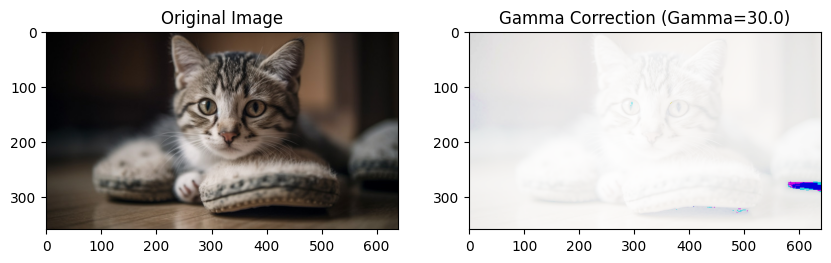

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Fungsi untuk menerapkan gamma correction
def adjust_gamma(image, gamma=1.0):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

# Baca gambar
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/kitten01.jpg')  # Ganti '/path_to_image/image.png' dengan lokasi gambar yang benar

# Minta input nilai gamma dari pengguna
try:
    gamma = float(input("Masukkan nilai Gamma: "))
except ValueError:
    print("Error, not a number")

# Terapkan gamma correction pada gambar
adjusted = adjust_gamma(image, gamma=gamma)

# Tampilkan gambar sebelum dan sesudah gamma correction
plt.figure(figsize=(10,5))

# Gambar asli
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Gambar setelah gamma correction
plt.subplot(1, 2, 2)
plt.title(f'Gamma Correction (Gamma={gamma})')
plt.imshow(cv2.cvtColor(adjusted, cv2.COLOR_BGR2RGB))

plt.show()


Masukkan nilai bit-depth: 2


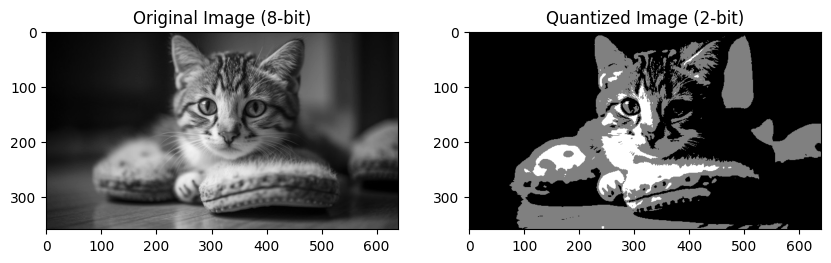

In [3]:

# Baca gambar grayscale
original = cv2.imread('/content/drive/MyDrive/PCVK/Images/kitten01.jpg', cv2.IMREAD_GRAYSCALE)

# Minta input bit depth dari pengguna
bit_depth = int(input("Masukkan nilai bit-depth: "))

# Hitung level warna berdasarkan bit-depth yang dimasukkan
level = 255 / (pow(2, bit_depth) - 1)

# Simulasi pengurangan kedalaman bit
depth_image = np.floor(original / level) * level
depth_image = depth_image.astype(np.uint8)

# Tampilkan gambar asli dan hasil kuantisasi
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.title('Original Image (8-bit)')
plt.imshow(original, cmap='gray')

plt.subplot(1, 2, 2)
plt.title(f'Quantized Image ({bit_depth}-bit)')
plt.imshow(depth_image, cmap='gray')

plt.show()

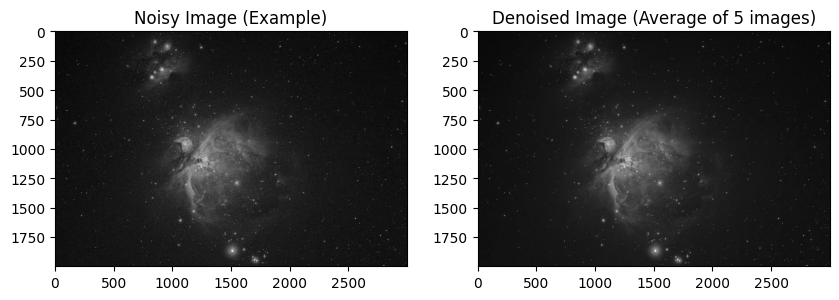

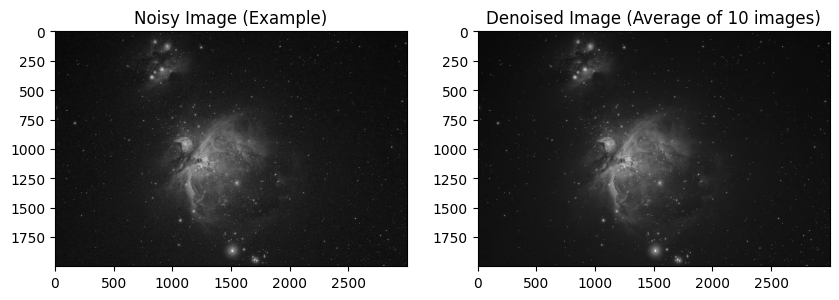

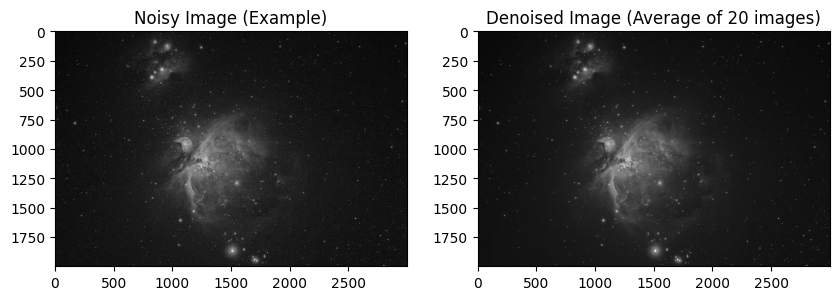

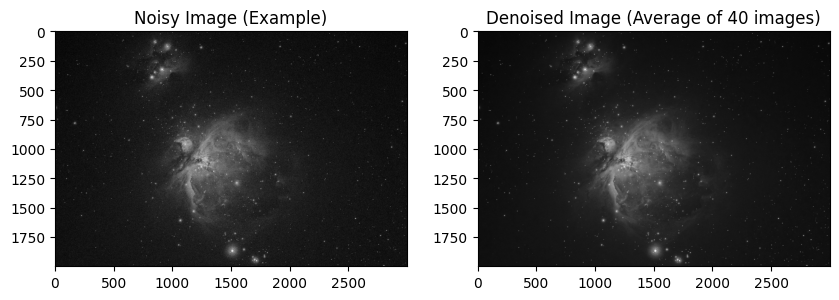

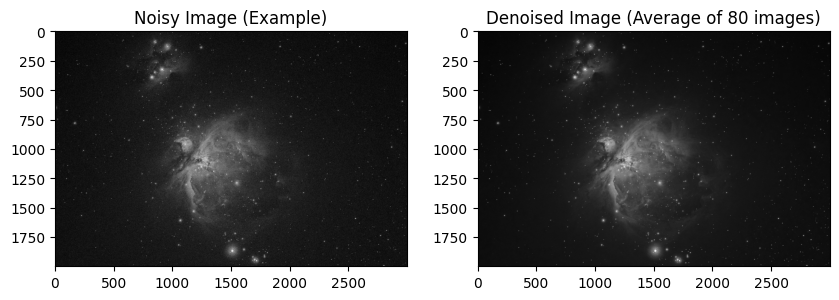

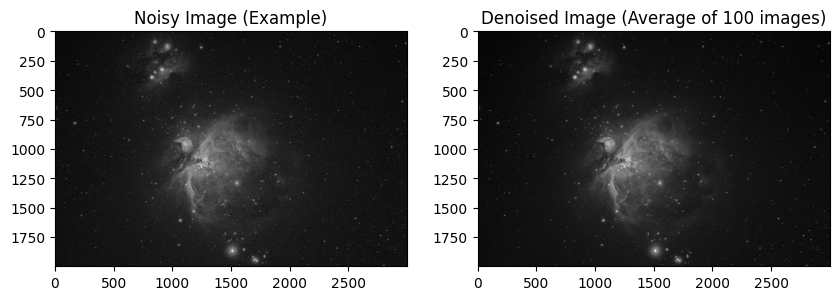

Number of averaged images: 5 - PSNR: 30.48 dB
Number of averaged images: 10 - PSNR: 31.73 dB
Number of averaged images: 20 - PSNR: 33.28 dB
Number of averaged images: 40 - PSNR: 34.92 dB
Number of averaged images: 80 - PSNR: 36.19 dB
Number of averaged images: 100 - PSNR: 36.50 dB


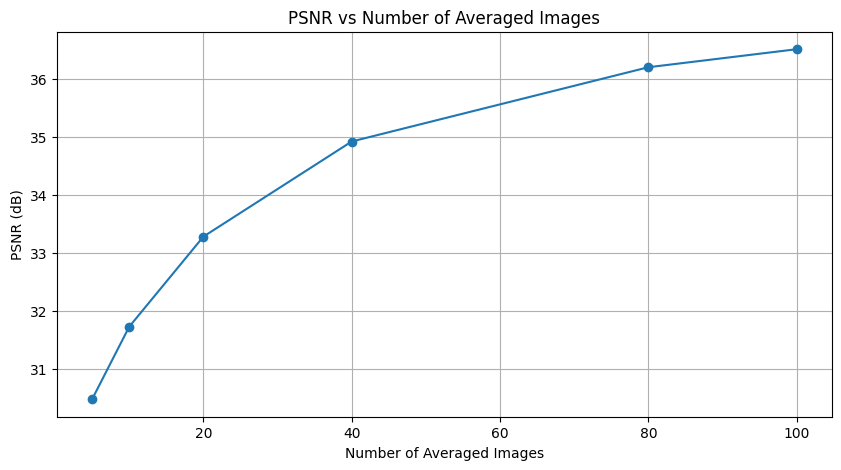

In [6]:
import cv2
import numpy as np
from math import log10, sqrt
import matplotlib.pyplot as plt

def calculate_psnr(original, denoised):
    mse = np.mean((original - denoised) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

def add_gaussian_noise(image, mean=0, sigma=25):
    gauss = np.random.normal(mean, sigma, image.shape)
    noisy = image + gauss
    return np.clip(noisy, 0, 255).astype(np.uint8)

original = cv2.imread('/content/drive/MyDrive/PCVK/Images/galaxy.jpg', cv2.IMREAD_GRAYSCALE)

num_noisy_images = 100
noisy_images = [add_gaussian_noise(original) for _ in range(num_noisy_images)]

num_images_list = [5, 10, 20, 40, 80, 100]
psnr_values = []

for num_images in num_images_list:
    # Averaging denoising
    avg_image = np.mean(noisy_images[:num_images], axis=0).astype(np.uint8)

    psnr = calculate_psnr(original, avg_image)
    psnr_values.append(psnr)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(noisy_images[0], cmap='gray')
    plt.title('Noisy Image (Example)')
    plt.subplot(1, 2, 2)
    plt.imshow(avg_image, cmap='gray')
    plt.title(f'Denoised Image (Average of {num_images} images)')
    plt.show()

for i, num_images in enumerate(num_images_list):
    print(f"Number of averaged images: {num_images} - PSNR: {psnr_values[i]:.2f} dB")

plt.figure(figsize=(10, 5))
plt.plot(num_images_list, psnr_values, marker='o')
plt.title('PSNR vs Number of Averaged Images')
plt.xlabel('Number of Averaged Images')
plt.ylabel('PSNR (dB)')
plt.grid(True)
plt.show()

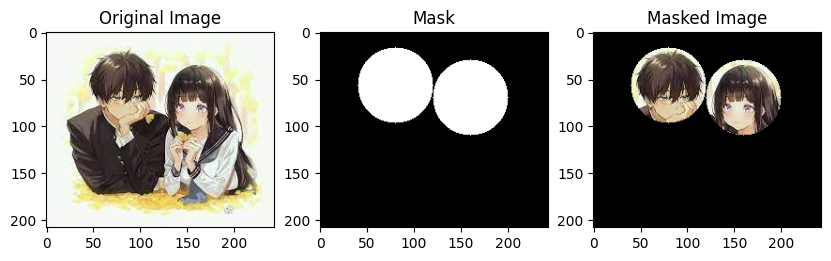

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca citra asli
# Check if the image file exists and the path is correct
image_path = '/content/drive/MyDrive/PCVK/Images/halo1.jpg'
image = cv2.imread(image_path)

# If the image is not loaded, print an error message and exit
if image is None:
    print(f"Error: Could not load image from {image_path}. Please check the file path and ensure the image file exists.")
    exit()

# Mengubah ke RGB (karena OpenCV membaca dalam format BGR)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Membuat mask berbentuk lingkaran untuk objek pertama
mask1 = np.zeros(image_rgb.shape[:2], dtype="uint8")
cv2.circle(mask1, (80, 57), 40, 255, -1)  # Circle di sekitar objek pertama (posisi dan ukuran bisa disesuaikan)

# Membuat mask berbentuk lingkaran untuk objek kedua
mask2 = np.zeros(image_rgb.shape[:2], dtype="uint8")
cv2.circle(mask2, (160, 70), 40, 255, -1)  # Circle di sekitar objek kedua

# Menggabungkan kedua mask
combined_mask = cv2.bitwise_or(mask1, mask2)

# Menerapkan mask pada citra
masked_image = cv2.bitwise_and(image_rgb, image_rgb, mask=combined_mask)

# Menampilkan hasil
plt.figure(figsize=(10, 5))

# Menampilkan citra asli
plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Image')

# Menampilkan mask yang dibuat
plt.subplot(1, 3, 2)
plt.imshow(combined_mask, cmap='gray')
plt.title('Mask')

# Menampilkan hasil masking (hanya objek di dalam lingkaran yang terlihat)
plt.subplot(1, 3, 3)
plt.imshow(masked_image)
plt.title('Masked Image')

plt.show()

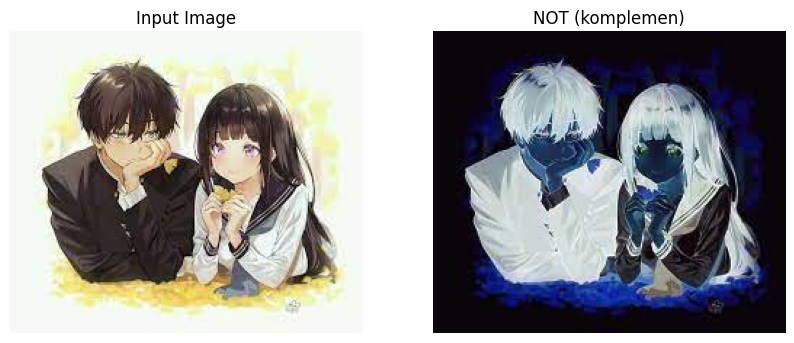

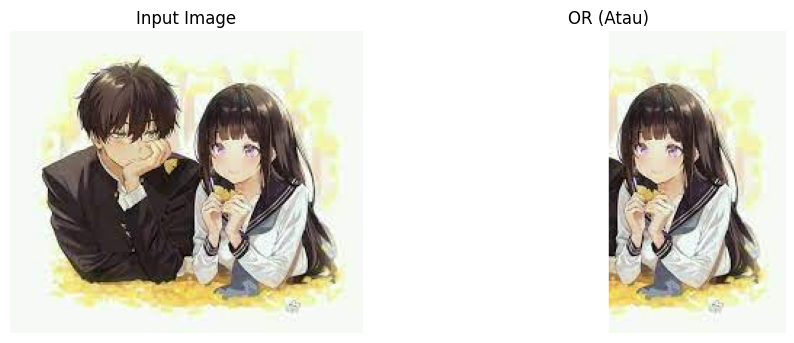

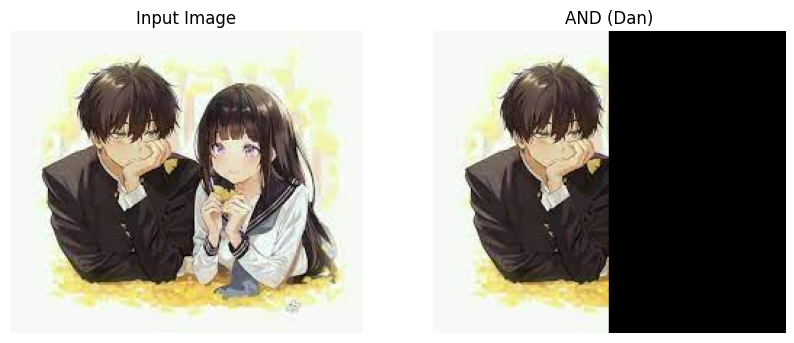

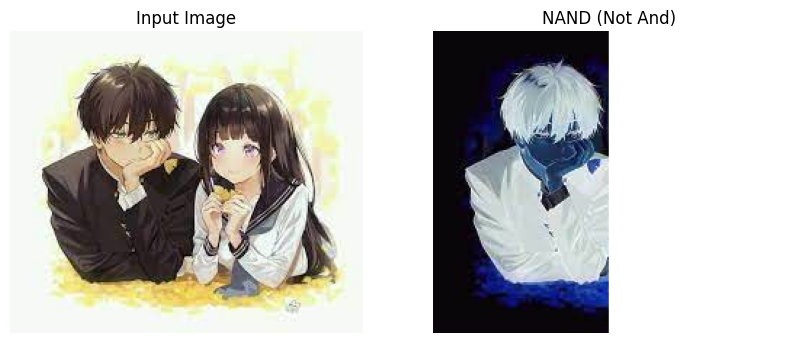

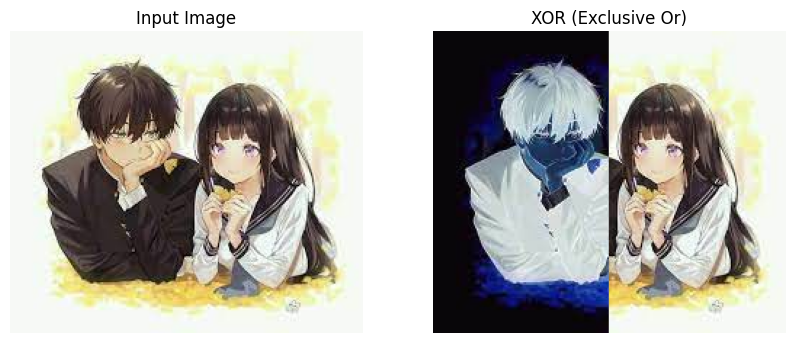

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_images(title1, image1, title2, image2):
    plt.figure(figsize=(10,5))
    plt.subplot(121), plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)), plt.title(title1), plt.axis('off')
    plt.subplot(122), plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)), plt.title(title2), plt.axis('off')
    plt.show()

img = cv2.imread('/content/drive/MyDrive/PCVK/Images/halo1.jpg')

mask = np.zeros(img.shape, dtype=np.uint8)
mask[:, :img.shape[1]//2] = 255

not_img = cv2.bitwise_not(img)
or_img = cv2.bitwise_or(img, mask)
and_img = cv2.bitwise_and(img, mask)
nand_img = cv2.bitwise_not(cv2.bitwise_and(img, mask))
xor_img = cv2.bitwise_xor(img, mask)

show_images("Input Image", img, "NOT (komplemen)", not_img)
show_images("Input Image", img, "OR (Atau)", or_img)
show_images("Input Image", img, "AND (Dan)", and_img)
show_images("Input Image", img, "NAND (Not And)", nand_img)
show_images("Input Image", img, "XOR (Exclusive Or)", xor_img)